# The goal of this project is to parse data and predict car prices.


In [ ]:
import math
import requests, json
#from bs4 import BeautifulSoup   
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import Pool, CatBoostRegressor
from tqdm import tqdm
from sklearn.base import clone
from sklearn.neighbors._regression import KNeighborsRegressor
from sklearn.svm._classes import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from random import randrange
from sklearn.model_selection import GridSearchCV


for reproducible results

In [64]:
RANDOM_SEED = 42


provided data (w/o price)

In [65]:
test_cars = pd.read_csv('test_cars.csv')
test_cars['sample'] = 1

c:\users\trigu\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12,16,17,19,20,32,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


drop columns we cannot download

In [66]:
test_cars=test_cars.drop(['car_url', 'sell_id', 'image', 'model_info',
                          'parsing_unixtime', 'priceCurrency', 'super_gen', 'vendor', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'], axis=1)
len(test_cars.columns)

25

In [67]:
test_cars.columns

Index(['bodyType', 'brand', 'color', 'complectation_dict', 'description',
       'engineDisplacement', 'enginePower', 'equipment_dict', 'fuelType',
       'mileage', 'modelDate', 'model_name', 'name', 'numberOfDoors',
       'productionDate', 'vehicleConfiguration', 'vehicleTransmission',
       'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние',
       'Таможня', 'sample'],
      dtype='object')

pre-downloaded latest data with price

In [ ]:
"""
auto_ru = {}
# сделаем тестовый вызов запроса для BMW модели M6 и выведем его на экран, чтобы по нему можно было сделать функцию для создания 23 необходимых столбцов
# но сначала установим главные параметры запроса
mark = 'SKODA'  # марка
model = 'OCTAVIA'  # модель
geo_radius = 200  # радиус вокруг москвы = 200 км
geo_id = [213]  # Москва
top_days = "1"  # кол-во дней от текущей даты назад за которые запрашиваем объявления 

req_body = {
                'catalog_filter' : [{"mark": mark, "model": model}],
                'section': "used",
                'category': "cars",
                'sort': "fresh_relevance_1-desc",
                "top_days": "900",
                "geo_radius":geo_radius,
                "geo_id":geo_id,
                'page': 1
            }

response = requests.post(url, json=req_body, headers = HEADERS)
data = response.json()
for elem in data['offers']:
    ad = {}
    print(ad)
    #auto_ru[0] = ad
    break
    
iter_of_ads, iter_of_marks, old_iter_of_ads, sum_ads, sum_ads_from_dict = 0,0,0,0,0
space = ' '
max_page = 11
start_time_global = time.ctime()
for mark in marks:
    print(mark)
    start_time = time.ctime()
    ms = df_marks_and_models[mark].replace("'", '"').replace('" "', '", "').replace('"\n "', '", "')
    # print(ms)
    list_of_models = json.loads(ms)
    for model in list_of_models:
        print(model)
        for num_page in range(1, max_page):
            request = {
              "catalog_filter": [
                {
                  "mark": mark,
                  "model": model
                }
              ],
              "section": "used",
              "category": "cars",
              "output_type": "table",
              "geo_radius": 200,
              "geo_id": [
                213
              ]
            }
            try:
                response = requests.post(url, json=request, headers = HEADERS)
                data = response.json()
                if data['offers'] == []:
                    break
                else:
                    print('.', end='')
                    for elem in data['offers']:
                        # print(elem)
                        def from_elem_to_dict(d_elem, d_dict):
                            try: d_dict['bodyType'] = d_elem['vehicle_info']['configuration']['human_name']
                            except: d_dict['bodyType'] = None

                            try: d_dict['brand'] = d_elem['vehicle_info']['mark_info']['code']
                            except: d_dict['brand'] = None

                            try: d_dict['color'] = d_elem['color_hex']
                            except: d_dict['color'] = None

                            try: d_dict['fuelType'] = d_elem['lk_summary'].split()[-1]
                            except: d_dict['fuelType'] = None

                            try: d_dict['modelDate'] = d_elem['vehicle_info']['super_gen']['year_from']
                            except: d_dict['modelDate'] = None

                            try: d_dict['name'] =  d_elem['vehicle_info']['tech_param']['human_name']
                            except: d_dict['name'] = None

                            try: d_dict['numberOfDoors'] = d_elem['vehicle_info']['configuration']['doors_count']
                            except: d_dict['numberOfDoors'] = None

                            try: d_dict['productionDate'] = d_elem['documents']['year']
                            except: d_dict['productionDate'] = None

                            try: d_dict['vehicleTransmission'] = d_elem['vehicle_info']['tech_param']['transmission']
                            except: d_dict['vehicleTransmission'] = None

                            try: d_dict['engineDisplacement'] = d_elem['vehicle_info']['tech_param']['human_name'].split()[0]
                            except: d_dict['engineDisplacement'] = None

                            try: d_dict['vehicleConfiguration'] = elem['vehicle_info']['configuration']['body_type']+' '+d_dict['vehicleTransmission']+' '+d_dict['engineDisplacement']
                            except: d_dict['vehicleConfiguration'] = None

                            try: d_dict['enginePower'] = d_elem['vehicle_info']['tech_param']['power']
                            except: d_dict['enginePower'] = None

                            try: d_dict['description'] = d_elem['description']
                            except: d_dict['description'] = None

                            try: d_dict['mileage'] = d_elem['state']['mileage']
                            except: d_dict['mileage'] = None

                            try: d_dict['Комплектация'] = d_elem['vehicle_info']['complectation']
                            except: d_dict['Комплектация'] = None

                            try: d_dict['Привод'] = d_elem['lk_summary'].split(', ')[-2]
                            except: d_dict['Привод'] = None

                            try: d_dict['Руль'] = d_elem['vehicle_info']['steering_wheel']
                            except: d_dict['Руль'] = None

                            try: d_dict['Владельцы'] = d_elem['documents']['owners_number']
                            except: d_dict['Владельцы'] = None

                            try: d_dict['ПТС'] = d_elem['documents']['pts']
                            except: d_dict['ПТС'] = None

                            try: d_dict['Таможня'] = d_elem['documents']['custom_cleared']
                            except: d_dict['Таможня'] = None

                            try: d_dict['Владение'] =  d_elem['documents']['purchase_date']
                            except: d_dict['Владение'] = None

                            try: d_dict['price'] = d_elem['price_info']['RUR']
                            except: d_dict['price'] = None

                            try: d_dict['Состояние'] = d_elem['state_not_beaten']
                            except: d_dict['Состояние'] = None

                            # дата размещения объявления решил добавить 
                            try: d_dict['start_date'] =  d_elem['additional_info']['hot_info']['start_time']
                            except: d_dict['start_date'] = None

                            # статус объявления 
                            try: d_dict['hidden'] =  d_elemelem['additional_info']['hidden']
                            except: d_dict['hidden'] = None

                            d_dict['equipment_dict'] = d_elem['vehicle_info']['equipment']
                            # модель 
                            d_dict['model_name'] =  model

                            return d_dict
                        '''
                        ad = {
                            'bodyType': elem['vehicle_info']['configuration']['body_type'],
                            'brand': mark, 
                            #'car_url',
                            'color': color(),
                            #'complectation_dict': '',
                            'description': '', 
                            'engineDisplacement': '',
                            'enginePower': '', 
                            #'equipment_dict': '',
                            'fuelType': '', 
                            #'image': '', 
                            'mileage': '', 
                            'modelDate': '',
                            #'model_info': '',
                            'model_name': '',
                            'name': '', 
                            'numberOfDoors': '',
                            #'parsing_unixtime': '',
                            #'priceCurrency': '',
                            'productionDate': '', 
                            #'sell_id': '', 
                            #'super_gen': '',
                            'vehicleConfiguration': '',
                            'vehicleTransmission': '', 
                            #'vendor': '',
                            'Владельцы': '',
                            'Владение': '', 
                            'ПТС': '',
                            'Привод': '', 
                            'Руль': '', 
                            'Состояние': '',
                            'Таможня': ''}
                        '''
                        auto_ru[iter_of_ads] = from_elem_to_dict(elem, {})
                        iter_of_ads += 1
            except: 
                break
                #time.sleep(3)
print (f'Всего спарсили {iter_of_ads} строк, начало {start_time_global} конец {time.ctime()}')
"""

In [68]:
data_par = pd.read_csv('all_auto_ru_07_12_2020-11.csv')

Delete repeatable rows

In [69]:

data_par.drop_duplicates(inplace = True)
data_par['sample']=0

data_par=data_par.drop(['start_date', 'hidden'], axis=1)
len(data_par.columns)

26

In [70]:
data_par.columns

Index(['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'name',
       'numberOfDoors', 'productionDate', 'vehicleTransmission',
       'engineDisplacement', 'vehicleConfiguration', 'enginePower',
       'description', 'mileage', 'complectation_dict', 'Привод', 'Руль',
       'Владельцы', 'ПТС', 'Таможня', 'Владение', 'price', 'Состояние',
       'equipment_dict', 'model_name', 'sample'],
      dtype='object')

In [71]:
data_par.isnull().sum()

bodyType                    0
brand                       0
color                       0
fuelType                    0
modelDate                   0
name                        1
numberOfDoors               0
productionDate              0
vehicleTransmission         1
engineDisplacement          1
vehicleConfiguration        1
enginePower                 1
description               763
mileage                     0
complectation_dict          0
Привод                      1
Руль                        0
Владельцы                   3
ПТС                         3
Таможня                     0
Владение                14279
price                       1
Состояние               20635
equipment_dict              0
model_name                  0
sample                      0
dtype: int64

Remove lines with incorrect data and gaps

In [72]:
data_par = data_par[data_par['name'].notna()]
data_par = data_par[data_par['Владельцы'].notna()]
data_par = data_par[data_par['ПТС'].notna()]
data_par = data_par[data_par['price'].notna()]
data_par = data_par[data_par['enginePower'] > 33]   # drop a few strange vehicles


In [73]:
data_par.isnull().sum()

bodyType                    0
brand                       0
color                       0
fuelType                    0
modelDate                   0
name                        0
numberOfDoors               0
productionDate              0
vehicleTransmission         0
engineDisplacement          0
vehicleConfiguration        0
enginePower                 0
description               761
mileage                     0
complectation_dict          0
Привод                      0
Руль                        0
Владельцы                   0
ПТС                         0
Таможня                     0
Владение                14220
price                       0
Состояние               20566
equipment_dict              0
model_name                  0
sample                      0
dtype: int64

In [74]:
"""
e = data_par['enginePower'].value_counts()
for k, v in dict(e).items():
    print(k, v)
"""

"\ne = data_par['enginePower'].value_counts()\nfor k, v in dict(e).items():\n    print(k, v)\n"

Merge both Datasets

In [75]:
data = test_cars.append(data_par, sort=False).reset_index(drop=True)
data = data.drop(['Состояние'], axis=1)
data = data.drop(['name'], axis=1) # DSG 1.8 AMT (152 л.с.)

rename the columns

In [76]:
data.columns =  ['bodyType', 'brand', 'color', 'complectation_dict', 'description',
       'engineDisplacement', 'enginePower', 'equipment_dict', 'fuelType',
       'mileage', 'modelDate', 'model_name', 'numberOfDoors',
       'productionDate', 'vehicleConfiguration', 'vehicleTransmission',
       'owners', 'Possession', 'PTS', 'drive_unit', 'rudder',
       'choky', 'sample', 'price']
data.head(3)

,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,mileage,...,vehicleConfiguration,vehicleTransmission,owners,Possession,PTS,drive_unit,rudder,choky,sample,price
0,лифтбек,SKODA,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,74000,...,LIFTBACK ROBOT 1.2,роботизированная,3 или более,NaN,Оригинал,передний,Левый,Растаможен,1,NaN
1,лифтбек,SKODA,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,60563,...,LIFTBACK MECHANICAL 1.6,механическая,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,1,NaN
2,лифтбек,SKODA,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,88000,...,LIFTBACK ROBOT 1.8,роботизированная,1 владелец,NaN,Оригинал,передний,Левый,Растаможен,1,NaN


Fill some of Nans with popular values, in the cases where there too much Nuns fill gaps with "unknown"

In [77]:
nul_col=['fuelType', 'PTS']
for col in data[nul_col]:
    ch=data[col].value_counts().index[0]
    data[col]=data[col].fillna(ch)
unkn_col=['description', 'Possession']
for col in data[unkn_col]:
    data[col]=data[col].fillna('unknown')
    

In [78]:
data.isnull().sum()

bodyType                    0
brand                       0
color                       0
complectation_dict      28268
description                 0
engineDisplacement          0
enginePower                 0
equipment_dict           9992
fuelType                    0
mileage                     0
modelDate                   0
model_name                  0
numberOfDoors               0
productionDate              0
vehicleConfiguration        0
vehicleTransmission         0
owners                      0
Possession                  0
PTS                         0
drive_unit                  0
rudder                      0
choky                       0
sample                      0
price                   34686
dtype: int64

delete rows containing unique values in columns that cannot be unique

In [79]:
'''
columns_to_clean=['bodyType', 'brand',  'engineDisplacement',
       'enginePower',  'fuelType', 'modelDate',
       'model_name',  'numberOfDoors', 'productionDate',
       'vehicleConfiguration', 'vehicleTransmission', 'owners', 'Possession',
       'PTS', 'drive_unit', 'rudder',  'choky' ]
for col in columns_to_clean:
    
    #data_sub=data[data['sample']==1]
    data = data[data[col].isin(data[col].value_counts()[data[col].value_counts()>5].index)]

data.head(3)
'''

"\ncolumns_to_clean=['bodyType', 'brand',  'engineDisplacement',\n       'enginePower',  'fuelType', 'modelDate',\n       'model_name',  'numberOfDoors', 'productionDate',\n       'vehicleConfiguration', 'vehicleTransmission', 'owners', 'Possession',\n       'PTS', 'drive_unit', 'rudder',  'choky' ]\nfor col in columns_to_clean:\n    \n    #data_sub=data[data['sample']==1]\n    data = data[data[col].isin(data[col].value_counts()[data[col].value_counts()>5].index)]\n\ndata.head(3)\n"

In [80]:
'''
columns_to_clean_sample=['bodyType', 'brand',  'engineDisplacement',
       'enginePower',  'fuelType', 'modelDate',
       'model_name',  'numberOfDoors', 'productionDate',
       'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'Владение', 'ПТС',
       'Привод', 'Руль', 'Состояние', 'Таможня' ]
'''       

"\ncolumns_to_clean_sample=['bodyType', 'brand',  'engineDisplacement',\n       'enginePower',  'fuelType', 'modelDate',\n       'model_name',  'numberOfDoors', 'productionDate',\n       'vehicleConfiguration', 'vehicleTransmission', 'Владельцы', 'Владение', 'ПТС',\n       'Привод', 'Руль', 'Состояние', 'Таможня' ]\n"

In [81]:
'''
for col in columns_to_clean_sample:
    sample_submission = sample_submission[sample_submission[col].isin(sample_submission[col].value_counts()[sample_submission[col].value_counts()>5].index)]
sample_submission.shape  
'''

'\nfor col in columns_to_clean_sample:\n    sample_submission = sample_submission[sample_submission[col].isin(sample_submission[col].value_counts()[sample_submission[col].value_counts()>5].index)]\nsample_submission.shape  \n'

# Numerical features

Columns "enginePower", 'engineDisplacement', 'owners' have dirty values, however the contain also some numbers. Lets take them

In [82]:
data["enginePower"].value_counts()

249 N12    1708
150 N12    1698
150.0      1112
110 N12    1039
170 N12     976
           ... 
564.0         1
329.0         1
562.0         1
552.0         1
2 ключа       1
Name: enginePower, Length: 725, dtype: int64

In [83]:
def take_head(s):
    return str(s).split(" ")[0]

data["enginePower"]=data["enginePower"].map(lambda s: take_head(s))
data['engineDisplacement'] = data['engineDisplacement'].map(lambda s: take_head(s))
data['owners'] = data['owners'].map(lambda s: take_head(s))
#data['owners'].apply(splitting)

Some columns look numeric, but their value has type "str"

In [84]:
def convert_to_int(col):
    def reg_clien(stringa):
        stringa=str(stringa).strip()
        try:
            res=re.findall('\d+\.?\d+', string=str(stringa))[0]
        except: 
            res = '0'
        return res
    
    data[col] = data[col].fillna('0')
    data[col] = data[col].map(lambda a: reg_clien(a))
    data[col] = data[col].astype(np.float64)
    #data[col].astype(np.int32, inplace=True)
        


for col in ['mileage', "productionDate", "enginePower", 'engineDisplacement', 'modelDate', 'owners' ]:
    convert_to_int(col)




In [85]:
data['numberOfDoors'].value_counts()

5                         17631
4                         13339
5                         12609
4                          7666
2                          1242
2                          1172
3                           958
3                           618
0                             9
2.0 CVT (144 л.с.)            1
1.6 AT (98 л.с.)              1
1.8 AT (152 л.с.)             1
бензин                        1
0                             1
320i 2.0 AT (156 л.с.)        1
523i 2.5 AT (170 л.с.)        1
18i 2.0 AT (150 л.с.)         1
Name: numberOfDoors, dtype: int64

In [86]:
def doors(row):
    try:
        return int(row['numberOfDoors'].strip())
    except:
        return 5
data['numberOfDoors']=data.apply(lambda row:  doors(row), axis=1 )

check that these columns  are really numeric

In [87]:
for col in ['mileage', "productionDate", "enginePower", 'engineDisplacement', 'modelDate', 'owners', 'numberOfDoors' ]:
    print(data[col].dtypes)

float64
float64
float64
float64
float64
float64
int64


c:\users\trigu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


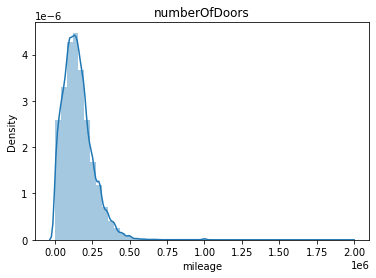

In [88]:
plt.figure()
sns.distplot(data['mileage'])
plt.title(col)
plt.show()
    

In [89]:
X_num = data[['mileage', "productionDate", "enginePower", 'engineDisplacement', 'modelDate', 'owners', 'numberOfDoors']][data['sample']==0]
X_num_sub = data[['mileage', "productionDate", "enginePower", 'engineDisplacement', 'modelDate', 'owners', 'numberOfDoors']][data['sample']==1]

# Binary features

Columns 'drive_unit','rudder','choky', 'PTS' have binar values, but they need to be cleaned

In [90]:
data['PTS'].value_counts()

Оригинал              30098
ORIGINAL              18018
Дубликат               4585
DUPLICATE              2548
1085512260                1
9 лет и 10 месяцев        1
3 года и 6 месяцев        1
Name: PTS, dtype: int64

In [91]:
data['PTS'] = data['PTS'].str.replace('Оригинал', 'ORIGINAL')
data['PTS'] = data['PTS'].str.replace('Дубликат', 'DUPLICATE')
data['PTS'].value_counts()

ORIGINAL              48116
DUPLICATE              7133
1085512260                1
9 лет и 10 месяцев        1
3 года и 6 месяцев        1
Name: PTS, dtype: int64

In [92]:
data['rudder'] = data['rudder'].str.replace('Левый', 'LEFT')
data['rudder'] = data['rudder'].str.replace('Правый', 'RIGHT')
data['rudder'].value_counts()

LEFT                             52760
RIGHT                             2485
задний                               3
передний                             3
ALLROAD_5_DOORS AUTOMATIC 4.6        1
Name: rudder, dtype: int64

In [93]:
data['choky']=data['choky'].astype('str')

In [94]:
X_bin = data[['drive_unit','rudder','PTS','choky']]
#bin_cols = ['drive_unit','rudder','PTS','choky']


Apply LabelEncoder for our binar features

In [95]:
label_encoder = LabelEncoder()

for column in X_bin.columns:
    X_bin[column] = label_encoder.fit_transform(X_bin[column])
X_bin.head(3)

<ipython-input-95-13b434733599>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bin[column] = label_encoder.fit_transform(X_bin[column])


,drive_unit,rudder,PTS,choky
0,4,1,4,3
1,4,1,4,3
2,4,1,4,3


# Categorical features

In [96]:
data["bodyType"]=data["bodyType"].map(lambda s: s.lower().strip())

In [97]:
"""
for col in ['bodyType', 'brand', 'color',   'fuelType',
       'model_name',   'vehicleTransmission']:
    col_to_show=data[col].value_counts()
    col_to_show.plot(kind='bar', title=col)
    #sns.countplot(x=data[column], data=data[bin_cols])
    plt.show()
"""

"\nfor col in ['bodyType', 'brand', 'color',   'fuelType',\n       'model_name',   'vehicleTransmission']:\n    col_to_show=data[col].value_counts()\n    col_to_show.plot(kind='bar', title=col)\n    #sns.countplot(x=data[column], data=data[bin_cols])\n    plt.show()\n"

In [98]:
"""
for col in ['bodyType', 'brand', 'color',   'fuelType', 
       'model_name',   'vehicleTransmission']:
    print('________________________')
    print(col)
    print('________________________')
    print(data[col].value_counts())
"""

"\nfor col in ['bodyType', 'brand', 'color',   'fuelType', \n       'model_name',   'vehicleTransmission']:\n    print('________________________')\n    print(col)\n    print('________________________')\n    print(data[col].value_counts())\n"

Apply OneHotEncoder for categorical features

First of all, reduce the number of car brands to popular, all others receive a "0"-value for OneHotEncoder

In [99]:
d = data['brand'].value_counts()
brand_pop = data['brand'].value_counts()[d > 34].keys()
set(brand_pop)

{'ACURA',
 'ALFA_ROMEO',
 'AUDI',
 'BENTLEY',
 'BMW',
 'CADILLAC',
 'CHERY',
 'CHEVROLET',
 'CHRYSLER',
 'CITROEN',
 'DAEWOO',
 'DATSUN',
 'DODGE',
 'FIAT',
 'FORD',
 'GAZ',
 'GEELY',
 'GREAT_WALL',
 'HAVAL',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'IG',
 'INFINITI',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LAND_ROVER',
 'LEXUS',
 'LIFAN',
 'LINCOLN',
 'LUAZ',
 'MASERATI',
 'MAZDA',
 'MERCEDES',
 'MINI',
 'MITSUBISHI',
 'MOSCVICH',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PORSCHE',
 'RAVON',
 'RENAULT',
 'ROLLS_ROYCE',
 'ROVER',
 'SAAB',
 'SEAT',
 'SKODA',
 'SMART',
 'SSANG_YONG',
 'SUBARU',
 'SUZUKI',
 'TAGAZ',
 'TOYOTA',
 'UAZ',
 'VAZ',
 'VOLKSWAGEN',
 'VOLVO',
 'VORTEX',
 'ZAZ'}

In [100]:
def popular_brands(e):
    if e in brand_pop:
        res = e
    else:
        res = 'other'
    return res

data['brand_pop'] = data['brand'].apply(lambda x: popular_brands(x))


In [101]:
X_cat_1 = OneHotEncoder(sparse = False).fit_transform(data[['fuelType', 'vehicleTransmission', 'brand_pop']])
X_cat_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Replace the values of 'bodyType', 'color', 'model_name', 'brand' with their value_counts

In [102]:
def clean_cat(data, cats):
    def encoder_cat(row, cat, vc):
        br = row[cat]
        return vc[br]

    X_cat = data[cats]
    for c in cats:
        vc = data[c].value_counts()
        X_cat[c]=data.apply(lambda row: encoder_cat(row, c, vc), axis=1)

    return X_cat

X_cat_2 = clean_cat(data, ['bodyType', 'color', 'model_name', 'brand'])

<ipython-input-102-bc66ec460ebf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[c]=data.apply(lambda row: encoder_cat(row, c, vc), axis=1)



Convert long string values from 'equipment_dict' to lists

In [119]:
def eq_fix(row, col):
    try:
        res= list(json.loads(row[col]).keys())
    except:
        res=[]

    return res
data['equipment_dict'] = data.apply(lambda row: eq_fix(row, 'equipment_dict'), axis=1)

Load 'complectation_dict' as Json and take 'available_options' from it

In [120]:
def comp_fix(row, col):
    try:
        res= json.loads(row[col].replace("'", '"'))['available_options']
    except:
        res=[]

    return res

data['complectation_dict'] = data.apply(lambda row: comp_fix(row, 'complectation_dict'), axis=1)

In [121]:

equip=[]
for car in data[data['sample'] == 0]['equipment_dict']:
    try:
        for eq in car:
            equip.append(eq)
    except:
        continue

for car in data[data['sample'] == 0]['complectation_dict']:
    try:
        for eq in car:
            equip.append(eq)
    except:
        continue

equipment=pd.Series(equip)
equipment=equipment.value_counts()
len(equipment)

<ipython-input-121-d3b875809e5c>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  equipment=pd.Series(equip)


0

In [122]:
# equipment=equipment[equipment.values > 20]
# len(equipment)

In [123]:
equipment

Series([], dtype: int64)

In [124]:
X_cat_3 = pd.DataFrame(data['sample'])
for col in equipment.index:
    def eq_col(row):
        return int((col in row['equipment_dict']) or (col in row['complectation_dict']) )
    
    X_cat_3[col]=data.apply(lambda row: eq_col(row), axis=1)
X_cat_3_sub=pd.DataFrame(X_cat_3)
X_cat_3 = X_cat_3[X_cat_3['sample']==0]
X_cat_3_sub = X_cat_3_sub[X_cat_3_sub['sample']==1]

Merge all features

In [125]:
X = np.hstack([X_num, X_bin[data['sample'] == 0], X_cat_1[data['sample'] == 0], X_cat_2[data['sample']==0], X_cat_3])

X_sub = np.hstack([X_num_sub, X_bin[data['sample'] == 1], X_cat_1[data['sample'] == 1], X_cat_2[data['sample']==1], X_cat_3_sub])
X_sub.shape

(34686, 102)

Apply StandardScaler to features


In [126]:
X = StandardScaler().fit_transform(X)
X_sub = StandardScaler().fit_transform(X_sub)


In [127]:
y = data['price'][data['sample']==0]
y

34686    199000.0
34687    550000.0
34688    250000.0
34689    400000.0
34690    400000.0
           ...   
55247    740000.0
55248    690000.0
55249    650000.0
55250    780000.0
55251     45000.0
Name: price, Length: 20566, dtype: float64

Split our data for training

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Model selection

If we have a very big dataset some models throw an error until we reduce data. This is a fanction for randoml spliting data with some factor

In [129]:
def split_factor(factor, X_train, y_train, X_test, y_test):
    _, X_train2, _, y_train2 = train_test_split(X_train, y_train, test_size=factor, random_state=RANDOM_SEED)
    _, X_test2, _, y_test2 = train_test_split(X_test, y_test, test_size=factor, random_state=RANDOM_SEED)
    return X_train2, y_train2, X_test2, y_test2

X_train2, y_train2, X_test2, y_test2 = split_factor(0.99, X_train, y_train, X_test, y_test)

Estimate the influence of features on our target

In [130]:
def f_classif_fix(factor, X, y):
    _, X_small, _, y_small = train_test_split(X, y, test_size=factor, random_state=RANDOM_SEED)
    imp_num = pd.Series(f_classif(X_small, y_small)[0])
    res = list()
    for idx, e in enumerate(np.array(imp_num)):
        if math.isnan(e):
            res.append(idx)
    res.reverse()
    return res

nan_idx = f_classif_fix(0.2, X, y)
nan_idx

c:\users\trigu\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  6  10  11  12  13  14  20  21  22  24  27  28  29  31  32  33  34 101] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\trigu\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[101, 34, 33, 32, 31, 29, 28, 27, 24, 22, 21, 20, 14, 13, 12, 11, 10, 6]

Delete features that don't have any influence on the target

In [131]:
for idx in nan_idx:
    def delete(x):
        np.delete(x, idx, 1)
    delete(X_test2)
    delete(X_test)
    delete(X_train2)
    delete(X_train)
    delete(X_sub)

Function for training, testing and estimating models

In [132]:
def trait_regressor(factor, X_train, y_train, X_test, y_test, model):
    X_train_small, y_train_small, X_test_small, y_test_small = split_factor(factor, X_train, y_train, X_test, y_test)
    model.fit(X_train_small, y_train_small)
    y_pred = model.predict(X_test_small)
    print('MAPE:', np.mean(np.abs((y_test_small - y_pred) / y_test_small)) * 100)
    return model

Linear regression often throw an error "LinAlgError: SVD did not converge in Linear Least Squares" until we reduce the data

In [133]:
xfactor = 0.99

# 173
lr_model = trait_regressor(0.002, X_train, y_train, X_test, y_test,
                              LinearRegression()
                           )

MAPE: 190.4614646039292


Random forest with default parameters

In [134]:
# 26.58
rf_1 = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
                            RandomForestRegressor(random_state = RANDOM_SEED)
                       )
# Look at parameters used by our current forest
# print('Параметры по умолчанию:\n')
pprint(rf_1.get_params())

MAPE: 26.590364991807547
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


The parameters from GridSearchCV did not improve MAPE from default.

In [135]:
"""
# MAPE: 27.06830268352361
# {'n_estimators': 50}
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000]
}
rf_best = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
                       GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, n_jobs = 6)
                       )
print(rf_best.best_params_)
"""

"\n# MAPE: 27.06830268352361\n# {'n_estimators': 50}\nparam_grid = {\n    'n_estimators': [50, 100, 200, 500, 1000]\n}\nrf_best = trait_regressor(xfactor, X_train, y_train, X_test, y_test,\n                       GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, n_jobs = 6)\n                       )\nprint(rf_best.best_params_)\n"

Desision Tree

In [136]:
# 34
ftree_def = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
                            DecisionTreeRegressor(random_state = RANDOM_SEED)
                            )

MAPE: 34.851099727738635


Gradient boosting with default parameters

In [137]:
# 50
gb_def = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
                         GradientBoostingRegressor(random_state = RANDOM_SEED)
                         )

MAPE: 49.8388763809681


In [138]:
# 27.41
gb = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
               GradientBoostingRegressor(
                    random_state = RANDOM_SEED,
                    max_depth = 6,
                    n_estimators = 500
                )
               )

MAPE: 27.12250223239557


The parameters GridSearchCV improved MAPE for GradientBoosting

In [139]:
# MAPE: 27.412957282389705
# {'max_depth': 6, 'n_estimators': 500}
param_grid = {
    'n_estimators': [200, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 6]
}
gb_2 = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
                       GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid, n_jobs = 6)
                       )
print(gb_2.best_params_)

MAPE: 27.243911804030656
{'max_depth': 6, 'n_estimators': 500}


SVR

In [140]:
# 137
svr = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
               SVR()
                )

MAPE: 137.82333112065464


KNeighborsRegressor

In [141]:
# 39
knn = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
               KNeighborsRegressor()
               )

MAPE: 39.522795935132116


Catboost 

In [142]:
# 31
cbr = trait_regressor(xfactor, X_train, y_train, X_test, y_test,
               CatBoostRegressor(
                        random_seed = RANDOM_SEED,
                        learning_rate = 0.05,
                        depth=9,
                        metric_period=100
                   # iterations = 1000,
    #                      custom_metric=['R2', 'MAE']
                        )
               )

0:	learn: 2896862.3055737	total: 159ms	remaining: 2m 39s
100:	learn: 1083216.7096492	total: 1.38s	remaining: 12.3s
200:	learn: 646752.7568895	total: 2.38s	remaining: 9.45s
300:	learn: 493350.0825883	total: 3.36s	remaining: 7.81s
400:	learn: 424496.7070039	total: 4.37s	remaining: 6.52s
500:	learn: 381034.0509416	total: 5.41s	remaining: 5.39s
600:	learn: 351424.3617730	total: 6.44s	remaining: 4.28s
700:	learn: 326421.4351326	total: 7.44s	remaining: 3.17s
800:	learn: 307532.9452215	total: 8.47s	remaining: 2.1s
900:	learn: 291368.9129577	total: 9.51s	remaining: 1.04s
999:	learn: 277073.4785739	total: 10.5s	remaining: 0us
MAPE: 31.12378660908975


#  Stacking

In [143]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    X_meta_train = np.zeros(len(y_train), dtype=np.float32)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
       # print("X_train.shape:", X_train.shape)
       # print("len(train_fold_index):",len(train_fold_index))
       # print("len(predict_fold_index):",len(predict_fold_index))
       # print("X_train.shape:", X_train.shape)
        #print('X_train[train_fold_index]', X_train[train_fold_index])
        #print('X_train[predict_fold_index]', X_train[predict_fold_index])
        
       # print("X_train:",X_train)
       # print("train_fold_index:",train_fold_index)
       # print("predict_fold_index:",predict_fold_index)
        
#X_fold_train = X_train[train_fold_index] #здесь происходит ошибка
        X_fold_train = X_train[train_fold_index]
        X_fold_predict = X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_model = clone(model)
        folded_model.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_model.predict(X_fold_predict)
        # print('X_meta_train', X_meta_train)
    
    meta_model = clone(model)
    meta_model.fit(X_train, y_train)
    
    X_meta_test = meta_model.predict(X_test)
    
    return X_meta_train, X_meta_test

In [144]:
def generate_meta_features(models, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(model, X_train, X_test, y_train, cv)
        for model in tqdm(models)
    ]

    stacked_features_train = np.column_stack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.column_stack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

In [145]:
cv = KFold(n_splits = 10, shuffle=True, random_state=RANDOM_SEED)

In [146]:
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestRegressor(random_state = RANDOM_SEED),
    DecisionTreeRegressor(random_state = RANDOM_SEED),
    GradientBoostingRegressor(
                    random_state = RANDOM_SEED,
                    max_depth = 6,
                    n_estimators = 500
                )
], X_train2, X_test2, y_train2, cv)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [12:00<00:00, 240.12s/it]


<AxesSubplot:>

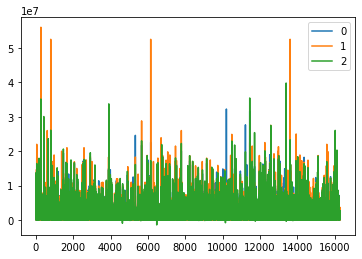

In [147]:
st_stacked_features_train = stacked_features_train
# st_stacked_features_train = StandardScaler().fit_transform(stacked_features_train)
# pd.DataFrame(st_stacked_features_train).plot()
pd.DataFrame(st_stacked_features_train).plot()

In [148]:
meta_GR = Regressor(random_state = RANDOM_SEED) # 44
# meta_GR = GradientBoostingRegressor(random_state = RANDOM_SEED, max_depth = 11, n_estimators = 1000)
meta_GR.fit(st_stacked_features_train, y_train2)
y_pred_meta_GR = meta_GR.predict(stacked_features_test)
print('MAPE:', np.mean(np.abs((y_test2 - y_pred_meta_GR) / y_test2)) * 100)

MAPE: 29.964085681181064


In [161]:
meta_LR = LinearRegression() # 44
# meta_GR = GradientBoostingRegressor(random_state = RANDOM_SEED, max_depth = 11, n_estimators = 1000)
meta_LR.fit(st_stacked_features_train, y_train2)
y_pred_meta_LR = meta_LR.predict(stacked_features_test)
print('MAPE:', np.mean(np.abs((y_test2 - y_pred_meta_LR) / y_test2)) * 100)

MAPE: 29.36429367799651


Another version of Stacking functions with a more usable interface

In [149]:
# get a list of base models
def get_models():
	models = list()
	models.append(('rf', RandomForestRegressor(random_state = RANDOM_SEED)))
	models.append(('dt', DecisionTreeRegressor(random_state = RANDOM_SEED)))
	models.append(('gb', GradientBoostingRegressor(
                    random_state = RANDOM_SEED,
                    max_depth = 6,
                    n_estimators = 500
                )))
	models.append(('svm', SVR()))
	return models

In [150]:
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = np.hstack(meta_X)
	# define blending model
	blender = RandomForestRegressor(random_state = RANDOM_SEED)
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

In [151]:
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = np.hstack(meta_X)
	# predict
	return blender.predict(meta_X)

In [152]:
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train2, y_train2, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)

Train: (5456, 102), Val: (2688, 102), Test: (8144, 102)


In [153]:
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('Blending MAE: %.3f' % score)

Blending MAE: 337597.937


In [154]:
# 43
print('MAPE:', np.mean(np.abs((y_test - yhat) / y_test)) * 100)


MAPE: 42.28900014681399


The best MAPE gave Random Forest with default parameters

# Submission

In [155]:
predict_submission = rf_1.predict(X_sub)
predict_submission

array([ 494581.1       ,  557300.82333333,  599746.12      , ...,
        585969.94      , 2245667.71      , 1568690.46      ])

In [156]:
predict_submission

array([ 494581.1       ,  557300.82333333,  599746.12      , ...,
        585969.94      , 2245667.71      , 1568690.46      ])

In [157]:
sample_submission=pd.read_csv('submission00.csv')
sample_submission.shape

(34686, 2)

In [158]:
sample_submission['price'] = predict_submission
# sample_submission['price'] = sample_submission['price'] * 0.75
sample_submission.to_csv(f'submission.csv', index=False)
sample_submission.head(10)


,sell_id,price
0,1100575026,4.945811e+05
1,1100549428,5.573008e+05
2,1100658222,5.997461e+05
3,1100937408,4.836911e+05
4,1101037972,5.838650e+05
5,1100912634,5.467280e+06
6,1101228730,3.997457e+05
7,1100165896,6.288000e+05
8,1100768262,8.607244e+06
9,1101218501,6.783500e+05
